In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
apb = pd.read_csv('access-prefer-block.csv')
posts = pd.read_csv('posts.csv')
subs = pd.read_csv('subscriptions.csv')
topics = pd.read_csv('topics.csv')
writers = pd.read_csv('writers.csv')

In [25]:
topics.head()

,id,subscription_id,account_id,phrase,description,created_at,purchased_posts,declined_posts,first_post_submitted_at,first_purchase_at,priority,focus_keywords,link,link_text,deadline,proposed_by,primary_industry
0,139746,13848,25502,NYC debates in the news,Posts should highlight the following a local (...,2017-07-06T00:00:00.000-06:00,2,0,2017-07-06T00:00:00.000-06:00,2017-07-06T00:00:00.000-06:00,Medium,NaN,NaN,NaN,NaN,NaN,Non-profit
1,139750,13850,25503,identity and access management,enables the right individuals to access the ri...,2017-07-06T00:00:00.000-06:00,1,0,2017-07-06T00:00:00.000-06:00,2017-08-03T00:00:00.000-06:00,Medium,NaN,NaN,NaN,NaN,NaN,IT & Data Security
2,139751,13850,25503,managed SIEM,security information and event management - a ...,2017-07-06T00:00:00.000-06:00,1,0,2017-07-08T00:00:00.000-06:00,2017-08-03T00:00:00.000-06:00,High,NaN,NaN,NaN,NaN,NaN,IT & Data Security
3,139752,13850,25503,managed security service,outsourcing cyber security functions to a mana...,2017-07-06T00:00:00.000-06:00,1,0,2017-07-08T00:00:00.000-06:00,2017-08-03T00:00:00.000-06:00,Medium,NaN,NaN,NaN,NaN,NaN,IT & Data Security
4,139753,13850,25503,penetration testing,an attempt to evaluate the security of an IT i...,2017-07-06T00:00:00.000-06:00,1,0,2017-07-06T00:00:00.000-06:00,2017-08-03T00:00:00.000-06:00,Medium,NaN,NaN,NaN,NaN,NaN,IT & Data Security


In [28]:
apb.purchased_posts.max()

131

In [37]:
np.where(subs.preferred_writers == 0, 1, 0).sum()/len(subs)

0.26208072768618534

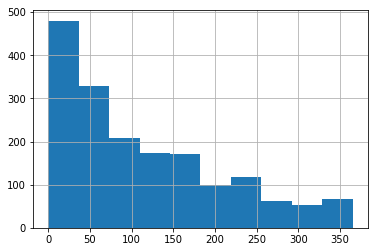

In [44]:
subs.current_lifetime_days.hist();

In [186]:
age_groups = dict()
group = 0
tk = np.where(subs.current_lifetime_days, False, False)
while np.any(~tk):
    group_name = 'week {}'.format((group+1)*1)
    group += 1
    next_group = np.where((subs.current_lifetime_days<group*7) & ~tk, True, False)
    tk = np.where(next_group, True, tk)
    age_groups[group_name] = next_group

In [112]:
industry = dict()
industries = subs.primary_industry.unique()
for ind in industries:
    industry[ind] = subs.primary_industry==ind

In [133]:
subs.preferred_writers.value_counts(ascending=False)

0     461
1     223
2     190
3     118
4     111
86     93
5      64
13     51
6      50
7      43
8      42
50     36
9      35
27     31
10     23
17     23
12     21
18     16
37     15
11     14
28     14
24     10
16      9
14      7
22      7
32      7
20      5
21      5
15      5
19      4
38      3
49      3
53      3
87      2
25      2
26      2
51      2
56      1
64      1
59      1
58      1
39      1
54      1
52      1
23      1
88      1
Name: preferred_writers, dtype: int64

In [132]:
subs.head()

,id,account_id,active_topics,bps_plan,decline_rate,purchased_posts,declined_posts,last_purchase_at,other_info,plan_words,plan_name,primary_industry,queued_posts,submitted_posts,preferred_writers,state,recently_started_on,recently_canceled_on,current_lifetime_days
0,85,85,0,Content,0.142857,36,6,2018-01-25T00:00:00.000-07:00,** Never use Trulia or Zillow as a source **,1000,Basic - 1000 words,Real Estate (Residential),0,35,1,expired,2017-11-16T00:00:00.000-07:00,2018-01-25T00:00:00.000-07:00,75
1,355,355,23,Content,0.158696,387,73,2018-06-30T00:00:00.000-06:00,I envision this site being a source of news an...,300,Basic - 300 words,Engineering,1,463,7,expired,2017-07-31T00:00:00.000-06:00,2018-06-05T00:00:00.000-06:00,320
2,503,503,4,+Optimize,0.272727,8,3,2018-03-13T00:00:00.000-06:00,"We need blog posts that are news, are related ...",600,Basic - 600 words,NaN,1,12,1,expired,2017-11-28T00:00:00.000-07:00,2018-02-21T00:00:00.000-07:00,92
3,599,599,1,+Optimize,NaN,0,0,NaN,"Steve is the founder of BuySafe, an e-commerce...",600,Basic - 600 words,NaN,3,6,0,expired,2018-02-06T00:00:00.000-07:00,2018-05-21T00:00:00.000-06:00,104
4,855,855,5,+Optimize,0.108108,66,8,2018-06-24T00:00:00.000-06:00,Please review our current blog (http://www.eho...,600,Basic - 600 words,NaN,6,81,2,active,2017-08-27T00:00:00.000-06:00,NaN,313


In [155]:
subs['days/writer'] = np.where(subs.preferred_writers>0, subs.current_lifetime_days/subs.preferred_writers, 0)

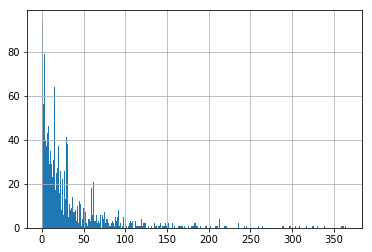

In [157]:
subs[subs['days/writer']>0]['days/writer'].hist(bins=300)

In [158]:
subs['has_writer'] = np.where(subs.preferred_writers>0, True, False)

In [176]:
np.where(subs[age_groups['weeks 2-4']].has_writer, 1, 0).sum()/len(subs[age_groups['weeks 2-4']])

0.6956521739130435

<BarContainer object of 53 artists>

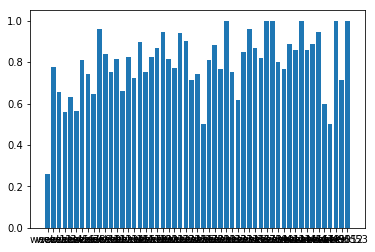

In [192]:
x = []
y = []
for grp in age_groups:
    x.append(grp)
    group = subs[age_groups[grp]]
    writer_perc = np.where(group.has_writer, 1, 0).sum()/len(group)
    y.append(writer_perc)
    
plt.bar(x, y)

In [196]:
subs[subs['days/writer']>0]['days/writer'].mean()

35.84131248718846

In [198]:
mean_dw = subs['days/writer'].mean()
print(mean_dw)

26.386867351284284


## Very General Stat
On average, a client gains a new preferred writer every 26 days.

### Question: Which new clients have preferred writers before 26 days?

In [248]:
gds = (subs.current_lifetime_days < mean_dw) & (subs['has_writer'])
bds = (subs.current_lifetime_days > mean_dw) & (~subs['has_writer'])

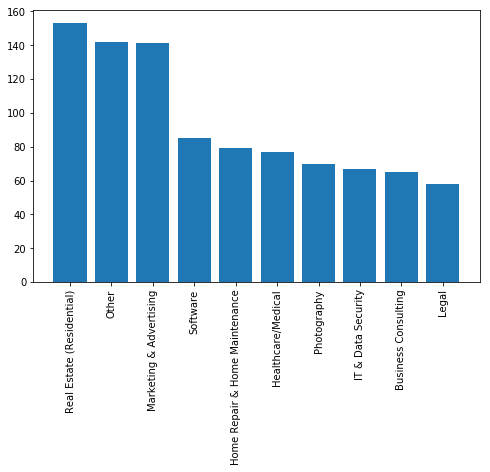

In [243]:
top = 10
x=[]
y=[]

for ind in industry:
    if pd.isnull(ind):
        x.append('unspecified')
    else:
        x.append(ind)
    no_subs = len(subs[industry[ind]])
    y.append(no_subs)
    
plot_df = pd.DataFrame(columns=['x', 'y'])
plot_df['x'] = x
plot_df['y'] = y
plot_df = plot_df.sort_values('y', ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(plot_df.x.iloc[:top], plot_df.y.iloc[:top]);
plt.xticks(rotation=90);

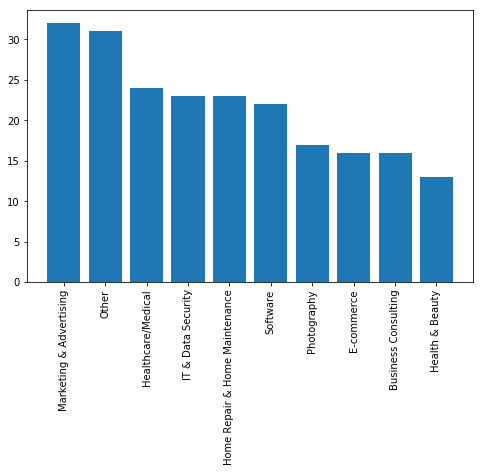

In [251]:
top = 10
x=[]
y=[]

for ind in industry:
    if pd.isnull(ind):
        x.append('unspecified')
    else:
        x.append(ind)
    no_subs = len(subs[industry[ind] & bds])
    y.append(no_subs)
    
plot_df = pd.DataFrame(columns=['x', 'y'])
plot_df['x'] = x
plot_df['y'] = y
plot_df = plot_df.sort_values('y', ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(plot_df.x.iloc[:top], plot_df.y.iloc[:top]);
plt.xticks(rotation=90);

In [255]:
avg_days = pd.DataFrame(columns=['industry', 'avg'])
inds = []
avgs = []
for ind in industry:
    mdw = subs[industry[ind]]['days/writer'].mean()
    inds.append(mdw)
    avgs.append(ind)
    
avg_days['industry'] = inds
avg_days['avg'] = avgs

avg_days.head()

,industry,avg
0,21.176353,Real Estate (Residential)
1,22.501904,Engineering
2,NaN,NaN
3,33.962722,Software
4,23.830944,Legal


In [257]:
avg_days.sort_values('industry')

,industry,avg
25,13.210990,Insurance
35,14.765921,Automotive
6,16.457635,Fitness
38,17.301179,Retail
23,17.678573,Real Estate (Commercial)
27,18.416458,Landscaping & Home Maintenance
24,18.948070,SEO/Content
14,19.221740,E-commerce
29,19.748367,Photography
0,21.176353,Real Estate (Residential)
